In [1]:
import warnings
warnings.filterwarnings('ignore') 
#python -m spacy download en_core_web_sm
#pip install pdfplumber
#pip install pywin32
#pip install docx2txt PyMuPDF pandas
#!pip install wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import string
import streamlit as st
from io import BytesIO
import click
import spacy
from spacy import displacy
import docx2txt
import pdfplumber
from pickle import load
import requests
import re
import os
import PyPDF2
import nltk
import re
import random
import fitz  # PyMuPDF
import win32com.client  # pywin32
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
# load pre-trained model
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.util import bigrams
from nltk import FreqDist
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot  as plt
from matplotlib.gridspec import GridSpec
stop=set(stopwords.words('english'))
from spacy.matcher import Matcher
# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is alrea

In [2]:
os.listdir('C:\\Users\\NAVEEN\\Downloads\\Resumes-20230909T063535Z-001\\Resumes')

['Peoplesoft resumes',
 'Reactjs',
 'SQL Developer Lightning insight',
 'workday resumes']

In [3]:
def extract_text_from_docx(docx_path):
    return docx2txt.process(docx_path)

def extract_text_from_pdf(pdf_path):
    pdf_text = ""
    pdf_document = fitz.open(pdf_path)
    for page_num in range(pdf_document.page_count):
        page = pdf_document[page_num]
        pdf_text += page.get_text()
    return pdf_text

def extract_text_from_doc(doc_path):
    word = win32com.client.Dispatch("Word.Application")
    doc = word.Documents.Open(doc_path)
    text = doc.Content.Text
    doc.Close()
    word.Quit()
    return text

def process_resumes(directory_path, category):
    file_paths = []
    texts = []

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)

        if filename.endswith('.docx'):
            text = extract_text_from_docx(file_path)
        elif filename.endswith('.pdf'):
            text = extract_text_from_pdf(file_path)
        elif filename.endswith('.doc'):
            text = extract_text_from_doc(file_path)
        else:
            continue  # Skip other file types

        file_paths.append(file_path)
        texts.append(text)

    df = pd.DataFrame({'File_Path': file_paths, 'Text': texts, 'Category': category})
    return df

# Example usage
peopleSoft_df = process_resumes('C:\\Users\\NAVEEN\\Downloads\\Resumes-20230909T063535Z-001\\Resumes\\Peoplesoft resumes','Peoplesoft resumes')
reactJS_df = process_resumes('C:\\Users\\NAVEEN\\Downloads\\Resumes-20230909T063535Z-001\\Resumes\\Reactjs','Reactjs')
sqlDeveloper_df = process_resumes('C:\\Users\\NAVEEN\\Downloads\\Resumes-20230909T063535Z-001\\Resumes\\SQL Developer Lightning insight', 'SQL Developer Lightning insight')
workday_df = process_resumes('C:\\Users\\NAVEEN\\Downloads\\Resumes-20230909T063535Z-001\\Resumes\\workday resumes','workday resumes')
# Concatenate DataFrames if needed
resume_data = pd.concat([peopleSoft_df, reactJS_df, sqlDeveloper_df,workday_df], ignore_index=True)

# Save the combined DataFrame to a CSV file
resume_data.to_csv('resumes.csv', index=False)


In [4]:
resume_data

,File_Path,Text,Category
0,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes
1,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft resumes
2,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,PeopleSoft Database Administrator\r ...,Peoplesoft resumes
3,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Classification: Internal\n\nClassification: In...,Peoplesoft resumes
4,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft resumes
...,...,...,...
74,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,\tWorkday Integration Consultant\r\rName ...,workday resumes
75,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes
76,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes
77,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes


# Tokenization

In [5]:
tokens = resume_data.Text.map(word_tokenize)

In [6]:
resume_df = [Text.strip() for Text in resume_data.Text]#remove both leading and trailing characters
resume_df = [Text for Text in resume_df if Text]# # removes empty strings, because they are considered in Python as False
resume_df[0:2]

['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMana

In [7]:
#oining all the data as text
review_text = ''.join(resume_df)
review_text[:1000]

'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

In [8]:
#replacing all /n
review_text =  review_text.replace('\n',"")
review_text[:1000]

'Anubhav Kumar Singh\t\tCore Competencies:Scripting\t\t: Shell ScriptingApplication\t\t: PeopleSoft HCM, FINANCIALSOperating System\t: Linux ,WindowsWeb/App Servers\t: Weblogic, TuxedoRDBMS\t\t: OracleRepository \t\t: GithubCore Competencies:Scripting\t\t: Shell ScriptingApplication\t\t: PeopleSoft HCM, FINANCIALSOperating System\t: Linux ,WindowsWeb/App Servers\t: Weblogic, TuxedoRDBMS\t\t: OracleRepository \t\t: Github  To work in a globally competitive environment on   challenging assignments that shall yield the   twin benefits of the job satisfaction and a steady-paced   professional growth.   Professional Experience 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\t\t\tCurrent Role: System Admin Offshore\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , GithubManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.Involved in Day to Day activities such as Project Migration, Database Refresh, 

In [9]:
from nltk.tokenize import TweetTokenizer
#extracting tokens from tokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens = tknzr.tokenize(review_text)
print(review_tokens[:100])

['Anubhav', 'Kumar', 'Singh', 'Core', 'Competencies', ':', 'Scripting', ':', 'Shell', 'ScriptingApplication', ':', 'PeopleSoft', 'HCM', ',', 'FINANCIALSOperating', 'System', ':', 'Linux', ',', 'WindowsWeb', '/', 'App', 'Servers', ':', 'Weblogic', ',', 'TuxedoRDBMS', ':', 'OracleRepository', ':', 'GithubCore', 'Competencies', ':', 'Scripting', ':', 'Shell', 'ScriptingApplication', ':', 'PeopleSoft', 'HCM', ',', 'FINANCIALSOperating', 'System', ':', 'Linux', ',', 'WindowsWeb', '/', 'App', 'Servers', ':', 'Weblogic', ',', 'TuxedoRDBMS', ':', 'OracleRepository', ':', 'Github', 'To', 'work', 'in', 'a', 'globally', 'competitive', 'environment', 'on', 'challenging', 'assignments', 'that', 'shall', 'yield', 'the', 'twin', 'benefits', 'of', 'the', 'job', 'satisfaction', 'and', 'a', 'steady-paced', 'professional', 'growth', '.', 'Professional', 'Experience', '06/2019', '-', 'Current', 'HCL', 'Current', 'Role', ':', 'System', 'Admin', 'Offshore', 'Skills', ':', 'Shell', 'Scripting']


In [10]:
#joining all the tokens 
review_tokens_text = ' '.join(review_tokens)
review_tokens_text[:1000]

'Anubhav Kumar Singh Core Competencies : Scripting : Shell ScriptingApplication : PeopleSoft HCM , FINANCIALSOperating System : Linux , WindowsWeb / App Servers : Weblogic , TuxedoRDBMS : OracleRepository : GithubCore Competencies : Scripting : Shell ScriptingApplication : PeopleSoft HCM , FINANCIALSOperating System : Linux , WindowsWeb / App Servers : Weblogic , TuxedoRDBMS : OracleRepository : Github To work in a globally competitive environment on challenging assignments that shall yield the twin benefits of the job satisfaction and a steady-paced professional growth . Professional Experience 06/2019 - Current HCL Current Role : System Admin Offshore Skills : Shell Scripting , Linux , PeopleSoft Administration , GithubManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.Involved in Day to Day activities such as Project Migration , Database Refresh , System admin changes , Tax updates etc . Troubleshooti

In [11]:
#removing puctuation 
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Anubhav Kumar Singh Core Competencies  Scripting  Shell ScriptingApplication  PeopleSoft HCM  FINANCIALSOperating System  Linux  WindowsWeb  App Servers  Weblogic  TuxedoRDBMS  OracleRepository  GithubCore Competencies  Scripting  Shell ScriptingApplication  PeopleSoft HCM  FINANCIALSOperating System  Linux  WindowsWeb  App Servers  Weblogic  TuxedoRDBMS  OracleRepository  Github To work in a globally competitive environment on challenging assignments that shall yield the twin benefits of the job satisfaction and a steadypaced professional growth  Professional Experience 062019  Current HCL Current Role  System Admin Offshore Skills  Shell Scripting  Linux  PeopleSoft Administration  GithubManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OSInvolved in Day to Day activities such as Project Migration  Database Refresh  System admin changes  Tax updates etc  Troubleshooting of various servers like applicati

In [12]:
#remove urls from text 
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'Anubhav Kumar Singh Core Competencies  Scripting  Shell ScriptingApplication  PeopleSoft HCM  FINANCIALSOperating System  Linux  WindowsWeb  App Servers  Weblogic  TuxedoRDBMS  OracleRepository  GithubCore Competencies  Scripting  Shell ScriptingApplication  PeopleSoft HCM  FINANCIALSOperating System  Linux  WindowsWeb  App Servers  Weblogic  TuxedoRDBMS  OracleRepository  Github To work in a globally competitive environment on challenging assignments that shall yield the twin benefits of the job satisfaction and a steadypaced professional growth  Professional Experience 062019  Current HCL Current Role  System Admin Offshore Skills  Shell Scripting  Linux  PeopleSoft Administration  GithubManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OSInvolved in Day to Day activities such as Project Migration  Database Refresh  System admin changes  Tax updates etc  Troubleshooting of various servers like applicati

In [13]:
#removing all the letters that dont have semantic meaning
def remove_single_double_letters(corpus):
    # Tokenize the corpus
    tokens = re.findall(r'\b\w+\b', corpus)

    # Filter out words with single or double letters
    filtered_tokens = [token for token in tokens if len(token) > 0]

    # Recreate the corpus without the filtered words
    filtered_corpus = ' '.join(filtered_tokens)
    
    return filtered_corpus

filtered_corpus = remove_single_double_letters(no_url_text)
print(filtered_corpus[:1000])

Anubhav Kumar Singh Core Competencies Scripting Shell ScriptingApplication PeopleSoft HCM FINANCIALSOperating System Linux WindowsWeb App Servers Weblogic TuxedoRDBMS OracleRepository GithubCore Competencies Scripting Shell ScriptingApplication PeopleSoft HCM FINANCIALSOperating System Linux WindowsWeb App Servers Weblogic TuxedoRDBMS OracleRepository Github To work in a globally competitive environment on challenging assignments that shall yield the twin benefits of the job satisfaction and a steadypaced professional growth Professional Experience 062019 Current HCL Current Role System Admin Offshore Skills Shell Scripting Linux PeopleSoft Administration GithubManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OSInvolved in Day to Day activities such as Project Migration Database Refresh System admin changes Tax updates etc Troubleshooting of various servers like application servers Web Servers Process Sch

In [14]:
#apply tokenization on 100 words 
text_tokens = word_tokenize(filtered_corpus)
print(text_tokens[:100])

['Anubhav', 'Kumar', 'Singh', 'Core', 'Competencies', 'Scripting', 'Shell', 'ScriptingApplication', 'PeopleSoft', 'HCM', 'FINANCIALSOperating', 'System', 'Linux', 'WindowsWeb', 'App', 'Servers', 'Weblogic', 'TuxedoRDBMS', 'OracleRepository', 'GithubCore', 'Competencies', 'Scripting', 'Shell', 'ScriptingApplication', 'PeopleSoft', 'HCM', 'FINANCIALSOperating', 'System', 'Linux', 'WindowsWeb', 'App', 'Servers', 'Weblogic', 'TuxedoRDBMS', 'OracleRepository', 'Github', 'To', 'work', 'in', 'a', 'globally', 'competitive', 'environment', 'on', 'challenging', 'assignments', 'that', 'shall', 'yield', 'the', 'twin', 'benefits', 'of', 'the', 'job', 'satisfaction', 'and', 'a', 'steadypaced', 'professional', 'growth', 'Professional', 'Experience', '062019', 'Current', 'HCL', 'Current', 'Role', 'System', 'Admin', 'Offshore', 'Skills', 'Shell', 'Scripting', 'Linux', 'PeopleSoft', 'Administration', 'GithubManaging', 'PeopleSoft', 'HCM', 'and', 'PeopleSoft', 'FSCM', 'production', 'environments', 'along

In [15]:
#removing stopwords from corpus 
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Anubhav', 'Kumar', 'Singh', 'Core', 'Competencies', 'Scripting', 'Shell', 'ScriptingApplication', 'PeopleSoft', 'HCM', 'FINANCIALSOperating', 'System', 'Linux', 'WindowsWeb', 'App', 'Servers', 'Weblogic', 'TuxedoRDBMS', 'OracleRepository', 'GithubCore', 'Competencies', 'Scripting', 'Shell', 'ScriptingApplication', 'PeopleSoft', 'HCM', 'FINANCIALSOperating', 'System', 'Linux', 'WindowsWeb', 'App', 'Servers', 'Weblogic', 'TuxedoRDBMS', 'OracleRepository', 'Github', 'To', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steadypaced', 'professional', 'growth', 'Professional', 'Experience', '062019', 'Current', 'HCL', 'Current', 'Role', 'System', 'Admin', 'Offshore', 'Skills', 'Shell', 'Scripting', 'Linux', 'PeopleSoft', 'Administration', 'GithubManaging', 'PeopleSoft', 'HCM', 'PeopleSoft', 'FSCM', 'production', 'environments', 'along', 'support', 'environments', 'installed', 'Linux', 'Windows', '

In [16]:
#lowering letters of corpus
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['anubhav', 'kumar', 'singh', 'core', 'competencies', 'scripting', 'shell', 'scriptingapplication', 'peoplesoft', 'hcm', 'financialsoperating', 'system', 'linux', 'windowsweb', 'app', 'servers', 'weblogic', 'tuxedordbms', 'oraclerepository', 'githubcore', 'competencies', 'scripting', 'shell', 'scriptingapplication', 'peoplesoft', 'hcm', 'financialsoperating', 'system', 'linux', 'windowsweb', 'app', 'servers', 'weblogic', 'tuxedordbms', 'oraclerepository', 'github', 'to', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steadypaced', 'professional', 'growth', 'professional', 'experience', '062019', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skills', 'shell', 'scripting', 'linux', 'peoplesoft', 'administration', 'githubmanaging', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'support', 'environments', 'installed', 'linux', 'windows', '

In [17]:
from nltk.stem import PorterStemmer
#applying stemming 
ps = PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['anubhav', 'kumar', 'singh', 'core', 'compet', 'script', 'shell', 'scriptingappl', 'peoplesoft', 'hcm', 'financialsoper', 'system', 'linux', 'windowsweb', 'app', 'server', 'weblog', 'tuxedordbm', 'oraclerepositori', 'githubcor', 'compet', 'script', 'shell', 'scriptingappl', 'peoplesoft', 'hcm', 'financialsoper', 'system', 'linux', 'windowsweb', 'app', 'server', 'weblog', 'tuxedordbm', 'oraclerepositori', 'github', 'to', 'work', 'global', 'competit', 'environ', 'challeng', 'assign', 'shall', 'yield', 'twin', 'benefit', 'job', 'satisfact', 'steadypac', 'profession', 'growth', 'profession', 'experi', '062019', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshor', 'skill', 'shell', 'script', 'linux', 'peoplesoft', 'administr', 'githubmanag', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'product', 'environ', 'along', 'support', 'environ', 'instal', 'linux', 'window', 'osinvolv', 'day', 'day', 'activ', 'project', 'migrat', 'databas', 'refresh', 'system', 'admin', 'chang', 'tax', 

In [18]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

anubhav kumar singh core competencies scripting shell scriptingapplication peoplesoft hcm financialsoperating system linux windowsweb app servers weblogic tuxedordbms oraclerepository githubcore competencies scripting shell scriptingapplication peoplesoft hcm financialsoperating system linux windowsweb app servers weblogic tuxedordbms oraclerepository github to work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steadypaced professional growth professional experience 062019 current hcl current role system admin offshore skills shell scripting linux peoplesoft administration githubmanaging peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows osinvolved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application


In [19]:
#applying lemmatization
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['anubhav', 'kumar', 'singh', 'core', 'competency', 'script', 'shell', 'scriptingapplication', 'peoplesoft', 'hcm', 'financialsoperating', 'system', 'linux', 'windowsweb', 'app', 'servers', 'weblogic', 'tuxedordbms', 'oraclerepository', 'githubcore', 'competency', 'script', 'shell', 'scriptingapplication', 'peoplesoft', 'hcm', 'financialsoperating', 'system', 'linux', 'windowsweb', 'app', 'servers', 'weblogic', 'tuxedordbms', 'oraclerepository', 'github', 'to', 'work', 'globally', 'competitive', 'environment', 'challenge', 'assignment', 'shall', 'yield', 'twin', 'benefit', 'job', 'satisfaction', 'steadypace', 'professional', 'growth', 'professional', 'experience', '062019', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skill', 'shell', 'script', 'linux', 'peoplesoft', 'administration', 'githubmanage', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environment', 'along', 'support', 'environment', 'instal', 'linux', 'windows', 'osinvolve', 'day', 'day', 

In [20]:
#joining lemmas into corpus
clean_review=' '.join(lemmas)
clean_review[:1000]

'anubhav kumar singh core competency script shell scriptingapplication peoplesoft hcm financialsoperating system linux windowsweb app servers weblogic tuxedordbms oraclerepository githubcore competency script shell scriptingapplication peoplesoft hcm financialsoperating system linux windowsweb app servers weblogic tuxedordbms oraclerepository github to work globally competitive environment challenge assignment shall yield twin benefit job satisfaction steadypace professional growth professional experience 062019 current hcl current role system admin offshore skill shell script linux peoplesoft administration githubmanage peoplesoft hcm peoplesoft fscm production environment along support environment instal linux windows osinvolve day day activity project migration database refresh system admin change tax update etc troubleshoot various server like application server web servers process scheduler serversapplye tuxedo weblogic middleware cpu patch various applicationsworking shell script

# Applying on the DataFrame

In [21]:
from string import punctuation
#printing all the punctuation marks
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
#reading the first index
resume_data['Text'][0]

'Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nManag

In [23]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt)                                                          # stemming
     

In [24]:
resume_data['cleanResume'] = resume_data.Text.apply(lambda x: preprocess(x)) 

In [25]:
resume_data.to_csv('resumes.csv', index=False)

In [26]:
resume_data

,File_Path,Text,Category,cleanResume
0,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft resumes,profile summary years experience implementing ...
2,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,PeopleSoft Database Administrator\r ...,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Classification: Internal\n\nClassification: In...,Peoplesoft resumes,classification internal classification interna...
4,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...,...
74,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,\tWorkday Integration Consultant\r\rName ...,workday resumes,workday integration consultant name sri krishn...
75,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Srikanth (WORKDAY hCM Consultant)\t ...,workday resumes,srikanth workday hcm consultant seeking suitab...
76,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resumes,workday hcm fcm name kumar role workday consul...
77,C:\Users\NAVEEN\Downloads\Resumes-20230909T063...,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday resumes,venkateswarlu b workday consultant years exper...


In [27]:
resume_data.drop(['Text','File_Path'], axis = 1, inplace = True)
resume_data

,Category,cleanResume
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,profile summary years experience implementing ...
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,classification internal classification interna...
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,workday resumes,workday integration consultant name sri krishn...
75,workday resumes,srikanth workday hcm consultant seeking suitab...
76,workday resumes,workday hcm fcm name kumar role workday consul...
77,workday resumes,venkateswarlu b workday consultant years exper...


In [28]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [29]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,cleanResume
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...
1,Peoplesoft resumes,profile summary years experience implementing ...
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...
3,Peoplesoft resumes,classification internal classification interna...
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,workday resumes,workday integration consultant name sri krishn...
75,workday resumes,srikanth workday hcm consultant seeking suitab...
76,workday resumes,workday hcm fcm name kumar role workday consul...
77,workday resumes,venkateswarlu b workday consultant years exper...


In [30]:
resume_data.cleanResume[5]

'sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated b tech electronics communication engg v g r college engineering vizianagaram jntuk aggregate achieved marks th standard scored th standard achievements awarded bravo q q pat back q q techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server r cognizant technol ogy sol ut ions augus april voya financial insurance us client project deals support managing finance applications project expe

# ExplorataryData Analysis

In [31]:
categories = np.sort(resume_data['Category'].unique())
categories

array(['Peoplesoft resumes', 'Reactjs', 'SQL Developer Lightning insight',
       'workday resumes'], dtype=object)

In [32]:
df_categories = [resume_data[resume_data['Category'] == category].loc[:, ['cleanResume', 'Category']] for category in categories]
df_categories

[                                          cleanResume            Category
 0   anubhav kumar singh core competencies scriptin...  Peoplesoft resumes
 1   profile summary years experience implementing ...  Peoplesoft resumes
 2   peoplesoft database administrator gangareddy p...  Peoplesoft resumes
 3   classification internal classification interna...  Peoplesoft resumes
 4   priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft resumes
 5   sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft resumes
 6   peoplesoft administrator srinivas k experience...  Peoplesoft resumes
 7   peoplesoft admin varkala vikas career objectiv...  Peoplesoft resumes
 8   vinod akkala peoplesoft dba admin professional...  Peoplesoft resumes
 9   peoplesoft admin peoplesoft dba ganesh alladi ...  Peoplesoft resumes
 10  peoplesoft administration vivekanand sayana ca...  Peoplesoft resumes
 11  arun venu experience summary experience years ...  Peoplesoft resumes
 12  personal details nam

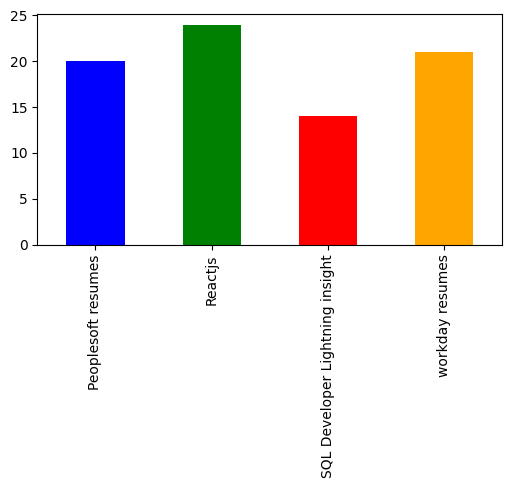

In [33]:
colors = ['blue', 'green', 'red', 'orange']
resume_data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(6,3), color=colors)
plt.show()

**'sql', 'database', 't-sql' has high frequency in our database**

In [34]:
def wordfreq(df):
    count = df['cleanResume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

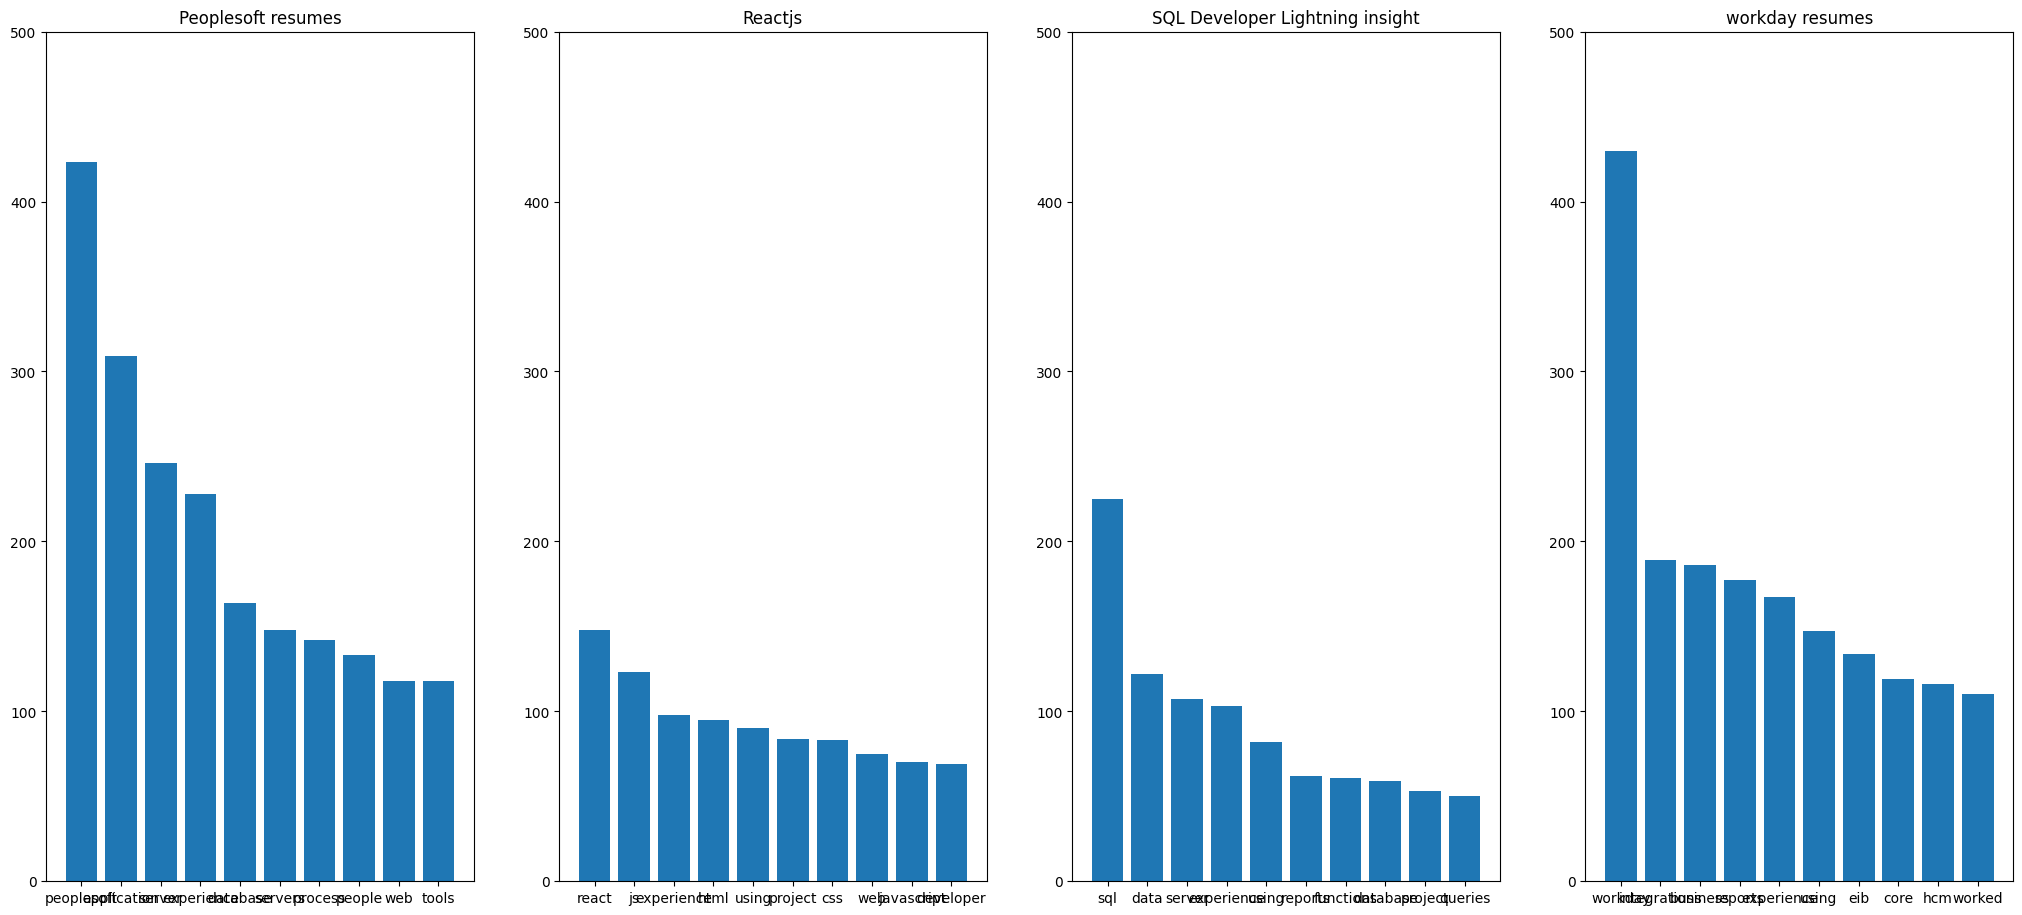

In [35]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()
     

<AxesSubplot: xlabel='count', ylabel='Category'>

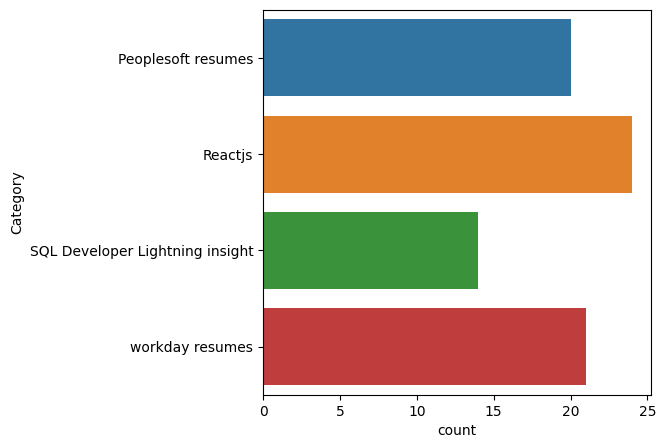

In [36]:
plt.figure(figsize=(5,5))
plt.xticks()
sns.countplot(y="Category", data=resume_data)

In [37]:
targetCounts = resume_data['Category'].value_counts().reset_index()['Category']
targetLabels  = resume_data['Category'].value_counts().reset_index()['index']
     

In [38]:
targetCounts    

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [39]:
targetLabels

0                            Reactjs
1                    workday resumes
2                 Peoplesoft resumes
3    SQL Developer Lightning insight
Name: index, dtype: object

# Pie chart for Percentage

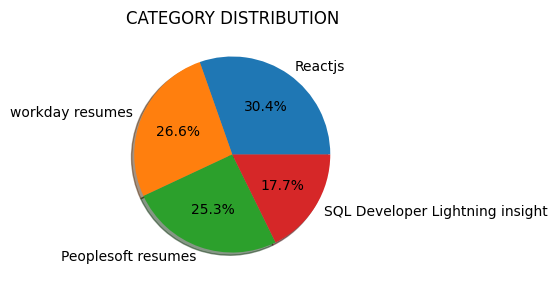

In [40]:
plt.figure(1, figsize=(7,7))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True) 

# Creating seperate columns for skills

In [41]:
## Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
## Function to extract technical skills from text
def extract_technical_skills(text):
    doc = nlp(text.lower())
    skills = []

    specific_skills = [
        'react js', 'python' , 'javascript', 'html', 'css', 'webpack', 'npm',
         'hcm', 'report writer', 'eib', 'core connector',
        'sql', 'database', 'pl/sql', 'oracle', 'mysql', 't-sql'
        , 'hrms', 'peoplecode', 'application engine', 'sqr'
    ]

    for keyword in specific_skills:
        if keyword in text.lower():
            skills.append(keyword)

    return skills

## Load the Excel file
df = pd.read_csv('Cleaned_Resumes.csv')
## Apply the extract_technical_skills function to the 'Extracted_text' column
df['Skills'] = df['cleanResume'].apply(extract_technical_skills)


## Save the modified DataFrame back to the Excel file
df.to_csv('Final.csv', index=False)

In [42]:
df = pd.read_csv('Final.csv')
df.head()

,Category,cleanResume,Skills
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...,"['hcm', 'database', 'oracle', 'hrms']"
1,Peoplesoft resumes,profile summary years experience implementing ...,"['hcm', 'database', 'oracle', 'hrms']"
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...,"['hcm', 'sql', 'database', 'oracle', 'hrms', '..."
3,Peoplesoft resumes,classification internal classification interna...,"['hcm', 'sql', 'database', 'oracle', 'hrms']"
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...,"['sql', 'database', 'sqr']"


In [43]:
df = df.drop(['cleanResume'], axis=1)
df.head()

,Category,Skills
0,Peoplesoft resumes,"['hcm', 'database', 'oracle', 'hrms']"
1,Peoplesoft resumes,"['hcm', 'database', 'oracle', 'hrms']"
2,Peoplesoft resumes,"['hcm', 'sql', 'database', 'oracle', 'hrms', '..."
3,Peoplesoft resumes,"['hcm', 'sql', 'database', 'oracle', 'hrms']"
4,Peoplesoft resumes,"['sql', 'database', 'sqr']"


In [44]:
df.isnull().sum()

Category    0
Skills      0
dtype: int64

In [45]:
df.dtypes

Category    object
Skills      object
dtype: object

In [46]:
## Count individuals with JavaScript skills
count = sum('javascript' in skills for skills in df['Skills'])
print(f"Count of individuals with JavaScript skills: {count}")

Count of individuals with JavaScript skills: 21


# Proportion of Different Skills

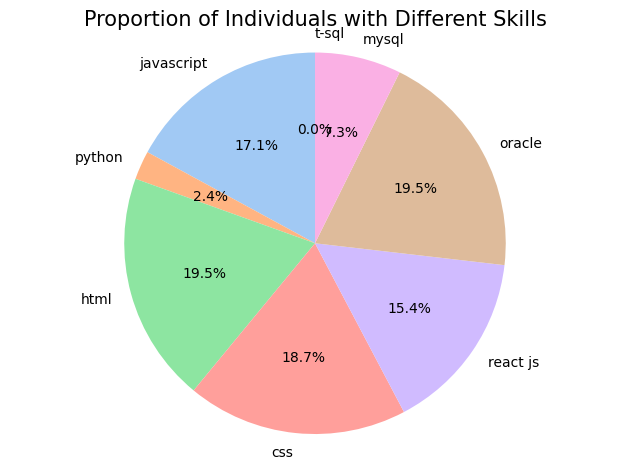

In [47]:
# Your skill data
skills = ['javascript', 'python', 'html', 'css', 'react js', 'oracle', 'mysql', 't-sql']
counts = [sum(skill in skills_list for skills_list in df['Skills']) for skill in skills]

# Create a custom color palette
custom_palette = sns.color_palette("pastel")

# Create a pie chart with the custom color palette
plt.pie(counts, labels=skills, autopct='%1.1f%%', startangle=90, colors=custom_palette)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Individuals with Different Skills', fontsize=15)
plt.tight_layout()
plt.show()


**Most of the candidates have 'Oracle' skill.**
**Proportion of 'python' skill is less**

# Frequency for Skills

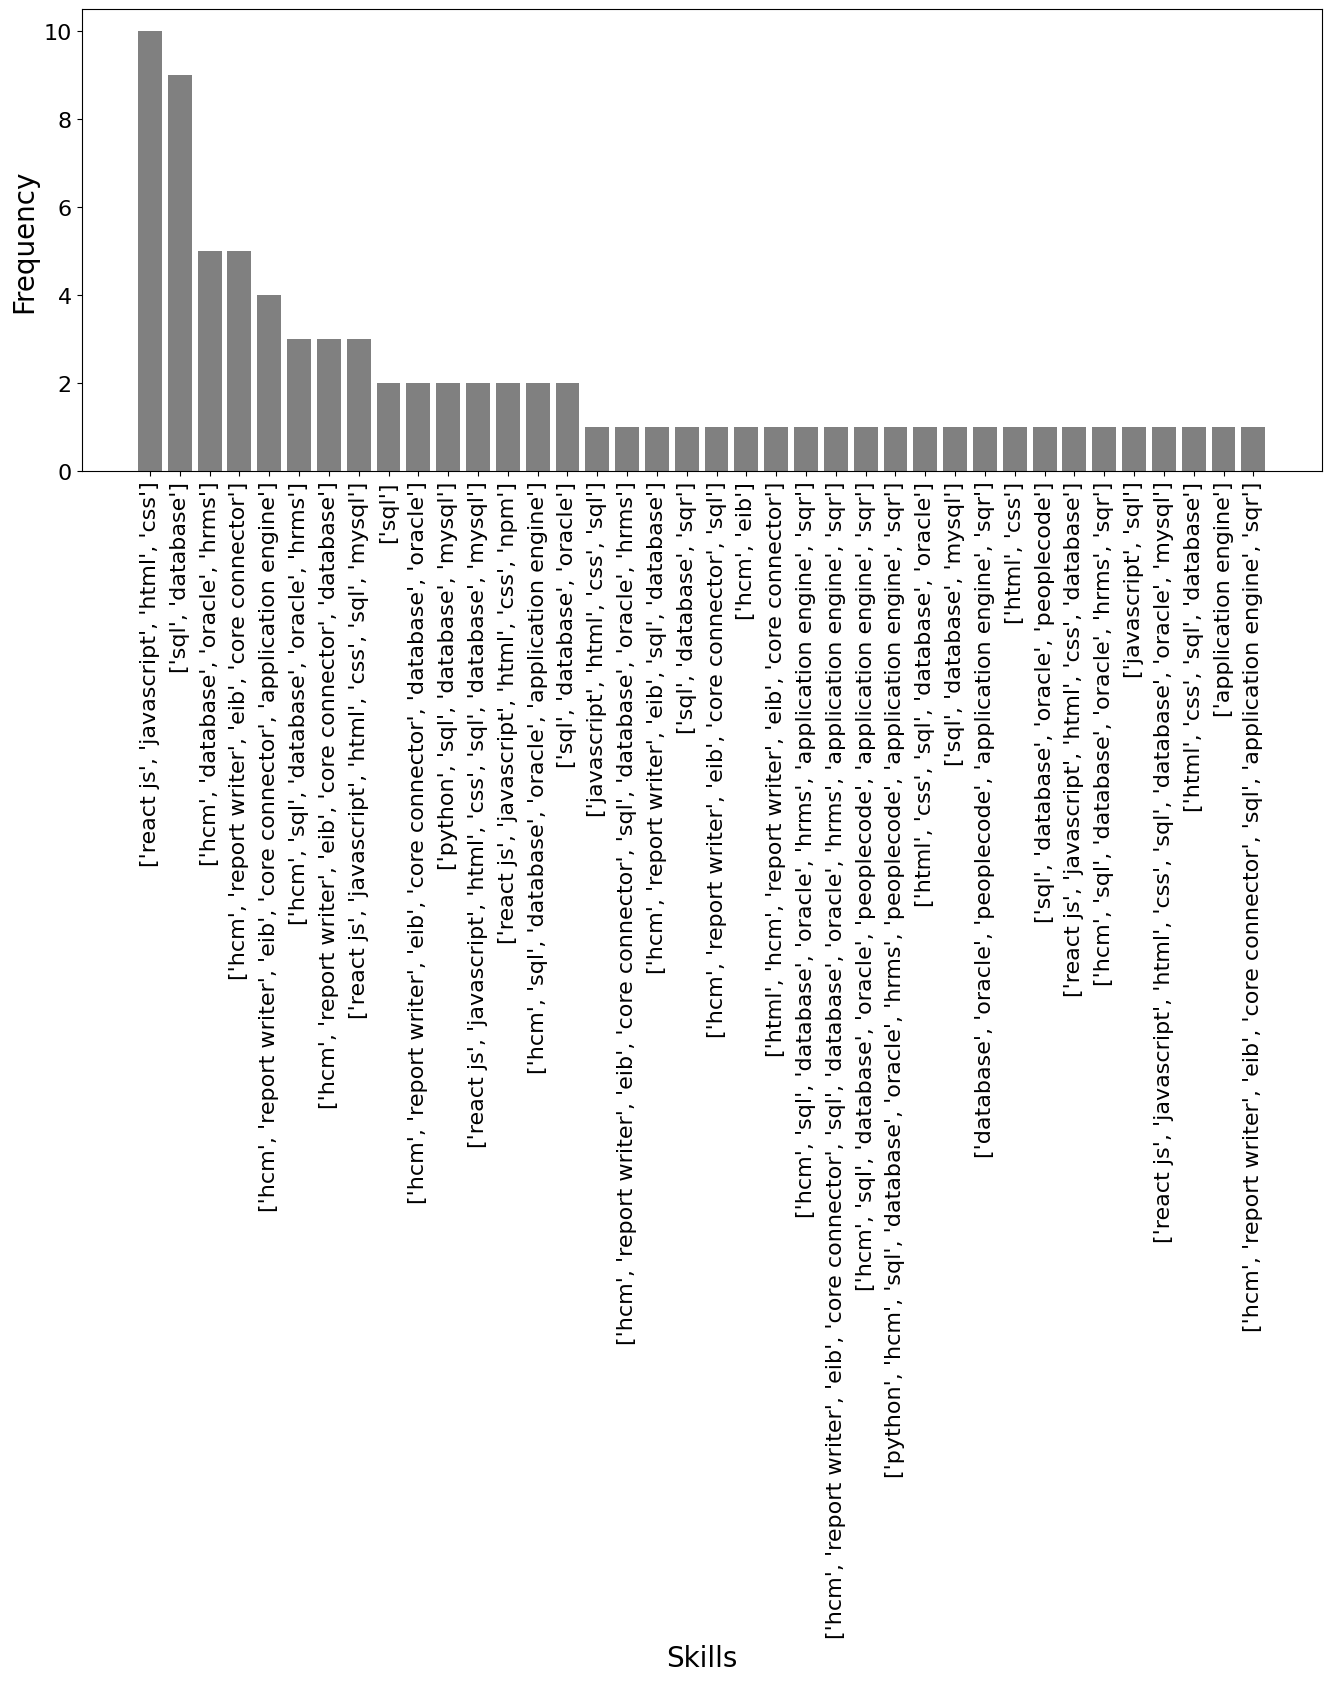

In [48]:
## Calculate the frequency of each category
category_counts = df['Skills'].value_counts()

## Create the bar plot
plt.figure(figsize=(16, 6))
plt.bar(category_counts.index, category_counts.values,color='gray')

## Customize the plot
plt.xlabel('Skills',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=16)
plt.xticks(rotation=90)
plt.yticks(fontsize=16)
plt.show()

# Proportion of JavaScript and SQL

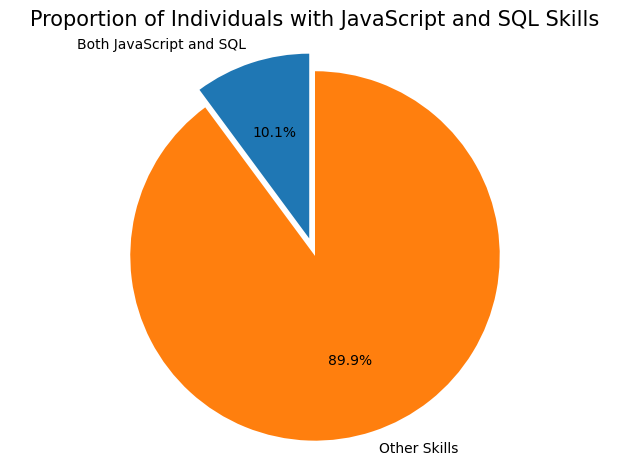

In [49]:
## Count individuals with both JavaScript and SQL skills
count = sum('javascript' in skills and 'sql' in skills for skills in df['Skills'])

## Calculate the proportion of individuals with both skills
total_individuals = len(df)
proportion = count / total_individuals

## Create a pie chart
labels = ['Both JavaScript and SQL', 'Other Skills']
sizes = [proportion, 1 - proportion]
explode = [0.1, 0]  ## Explode the "Both JavaScript and SQL" slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  ## Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Individuals with JavaScript and SQL Skills',fontsize=15)
plt.tight_layout()
plt.show()

**7.7% candidates knows both JavaScript and SQL skill**

# Skills in Each Category

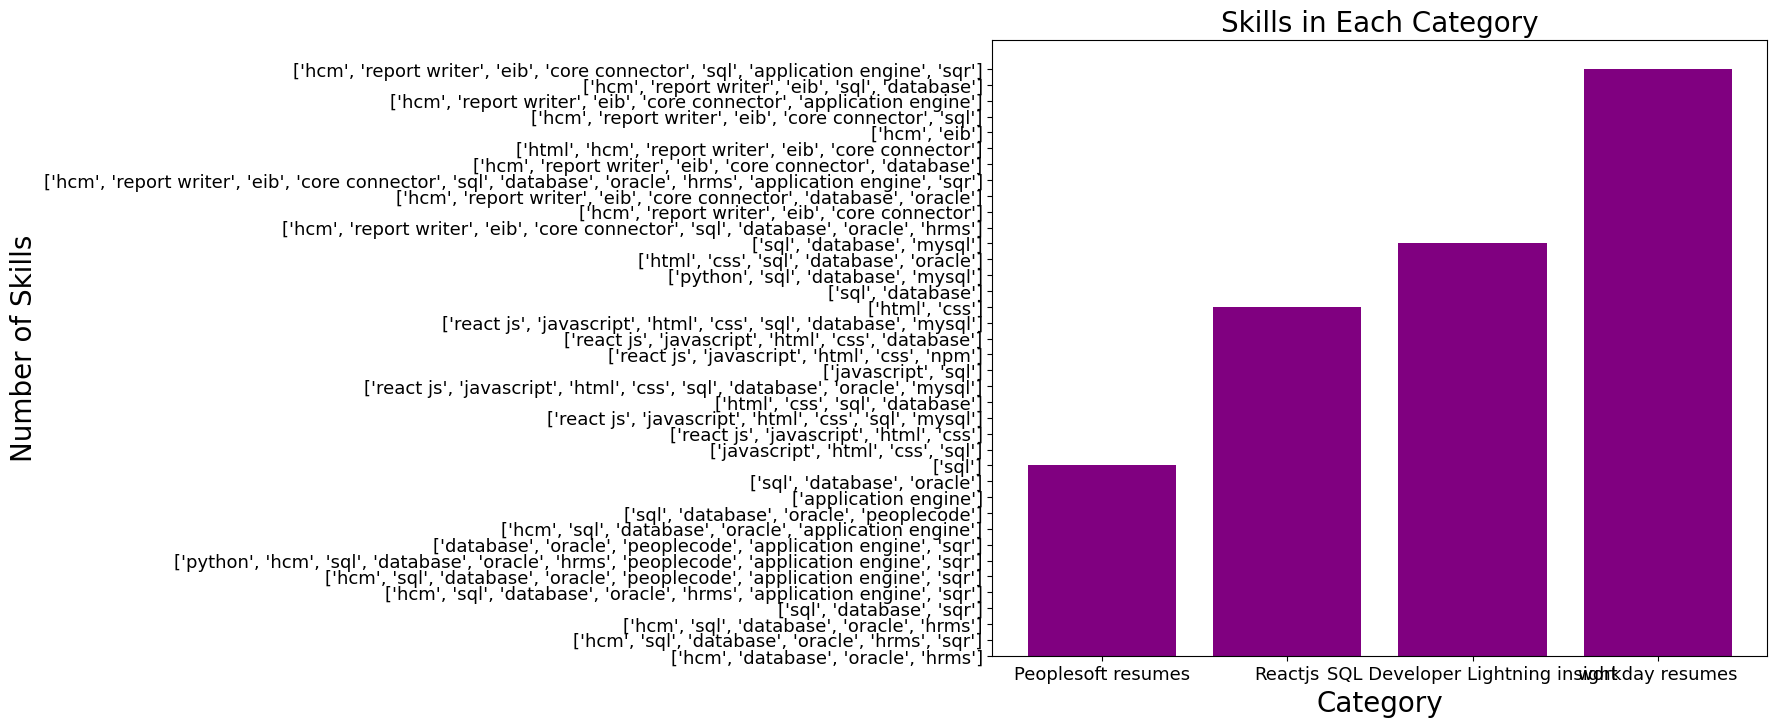

In [50]:
plt.figure(figsize=(10,8))
plt.bar(df['Category'], df['Skills'],color='purple')
plt.xlabel('Category',fontsize=(20))
plt.ylabel('Number of Skills',fontsize=(20))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Skills in Each Category',fontsize=(20))
plt.show()


In [51]:
nltk.download('stopwords')

oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []
Sentences = resume_data['cleanResume'].values

for records in Sentences:
    cleanedText = ""  # Initialize cleanedText as an empty string
    cleanedText += records
    requiredWords = nltk.word_tokenize(cleanedText)
    
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(20)
print(mostcommon)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('experience', 596), ('peoplesoft', 453), ('workday', 430), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('reports', 326), ('project', 325), ('sql', 279), ('business', 273), ('web', 249), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190)]


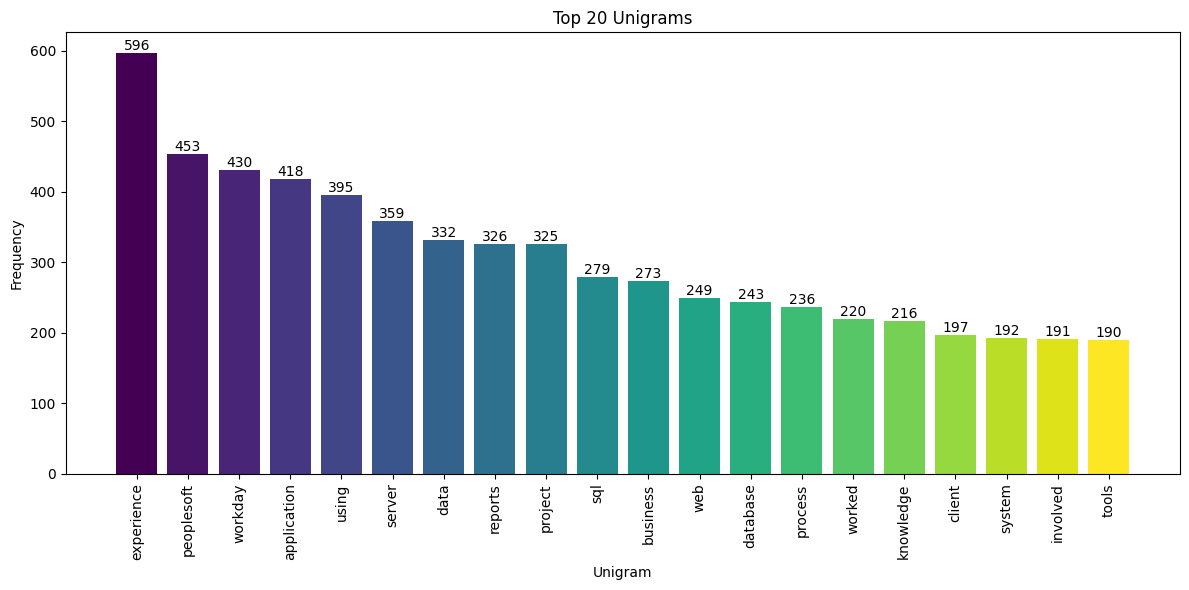

In [52]:
# Assuming you have 'mostcommon' as a list of (unigram, frequency) tuples

# Extract data for the top N unigrams and their frequencies
N = 20
x = [item[0] for item in mostcommon[:N]]
y = [item[1] for item in mostcommon[:N]]

# Create a range of N values from 0 to 1 (for color mapping)
colors = plt.cm.viridis(np.linspace(0, 1, N))

# Reduce the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a bar plot with bright colors for each bar
plt.bar(x, y, color=colors)
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 20 Unigrams')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add text labels with counts on top of the bars
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


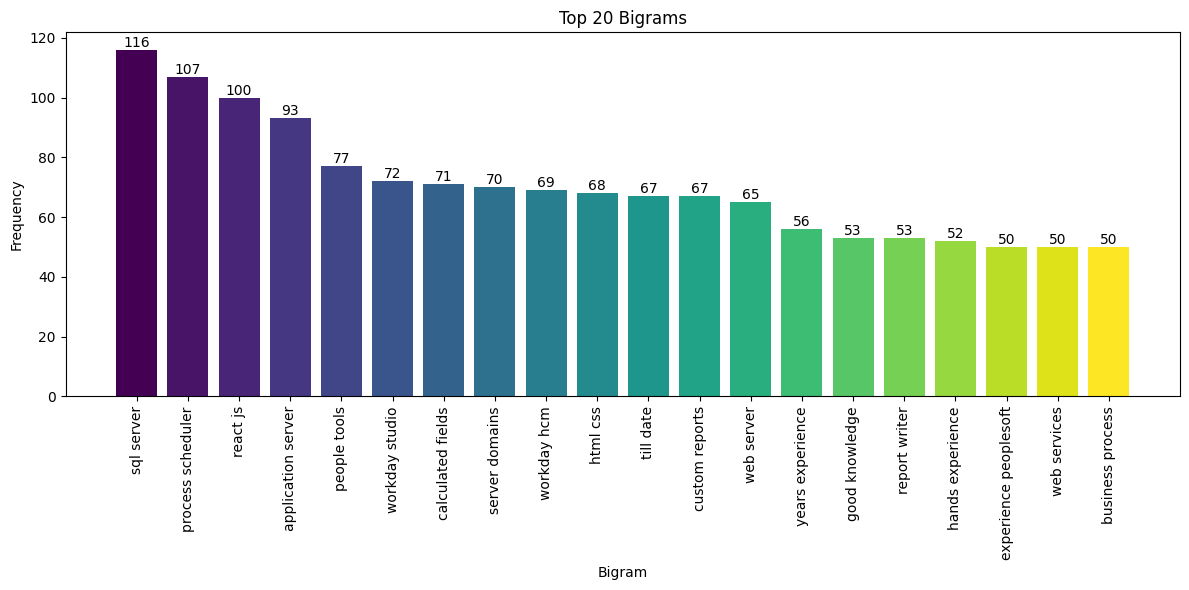

In [53]:
# Assuming you already have 'mostcommon' as a list of (word, frequency) tuples for unigrams
# You've defined 'totalWords' as the list of cleaned words

# Generate bigrams from the list of cleaned words
bigram_tuples = list(bigrams(totalWords))

# Calculate the frequency distribution of bigrams
bigram_freqdist = FreqDist(bigram_tuples)

# Get the most common 20 bigrams
mostcommon_bigram = bigram_freqdist.most_common(20)

# Extract data for the top N bigrams and their frequencies
N = 20
x_bigram = [' '.join(item[0]) for item in mostcommon_bigram]
y_bigram = [item[1] for item in mostcommon_bigram]

# Create a range of N values from 0 to 1 (for color mapping)
colors_bigram = plt.cm.viridis(np.linspace(0, 1, N))

# Reduce the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a bar plot with bright colors for each bigram
plt.bar(x_bigram, y_bigram, color=colors_bigram)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 20 Bigrams')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add text labels with counts on top of the bars
for i, v in enumerate(y_bigram):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


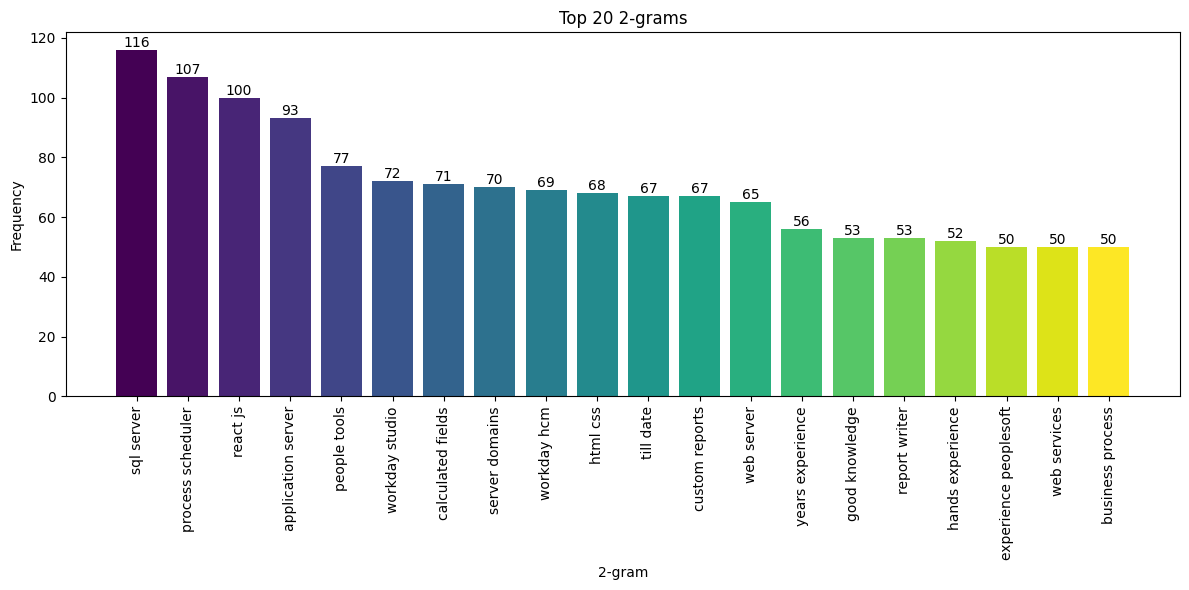

In [54]:
# Assuming you already have 'mostcommon' as a list of (word, frequency) tuples for unigrams
# You've defined 'totalWords' as the list of cleaned words

# Define the desired N for N-grams
N = 2  # This is for bigrams, change it for other N-grams

# Generate N-grams from the list of cleaned words
ngram_tuples = list(ngrams(totalWords, N))

# Calculate the frequency distribution of N-grams
ngram_freqdist = FreqDist(ngram_tuples)

# Get the most common 20 N-grams
mostcommon_ngram = ngram_freqdist.most_common(20)

# Extract data for the top N-grams and their frequencies
x_ngram = [' '.join(item[0]) for item in mostcommon_ngram]
y_ngram = [item[1] for item in mostcommon_ngram]

# Create a range of N values from 0 to 1 (for color mapping)
colors_ngram = plt.cm.viridis(np.linspace(0, 1, len(mostcommon_ngram)))

# Reduce the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create a bar plot with bright colors for each N-gram
plt.bar(x_ngram, y_ngram, color=colors_ngram)
plt.xlabel(f'{N}-gram')
plt.ylabel('Frequency')
plt.title(f'Top 20 {N}-grams')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add text labels with counts on top of the bars
for i, v in enumerate(y_ngram):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


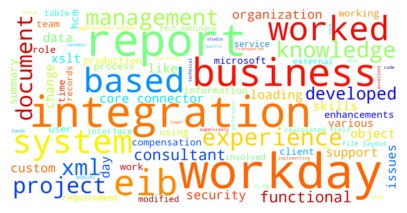

In [55]:
#!pip install wordcloud
stopwords_list = stopwords.words('english')
wc = WordCloud(
    background_color="white",
    stopwords=stopwords_list,
    width=1600,
    height=800,
    random_state=1,
    colormap='jet',
    max_words=80,
    max_font_size=200).generate(cleanedText)
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show() 

**Highlighted words ( integration, Workday, Development, business, system ) shows they have high frequency in resumes**
**Small words ( consultant,role ) has less frequency than large words**


In [56]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [ ]:
def get_custom_color(word, font_size, position, orientation, random_state=None, **kwargs):
    # Define a list of custom colors
    custom_colors = ['black', 'Blue', 'red', 'orange', 'green']
    
    # Randomly select a color from the list
    selected_color = random.choice(custom_colors)
    
    return selected_color

def wordcloud(df):
    txt = ' '.join(txt for txt in df['cleanResume'])
    
    wordcloud = WordCloud(
        height=4000,
        width=6000,
        background_color="white",
        color_func=get_custom_color  # Use the custom color function
    ).generate(txt)

    return wordcloud

# Example usage:
# Assuming df_categories is a list of DataFrames, one for each category
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')

plt.show()


# VECTORIZATION
**COUNT VECTORIZER tells the frequency of a word.**

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(resume_data["cleanResume"])
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names_out(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

,term,occurrences,frequency
0,abdul,3,0.000075
1,abilities,5,0.000125
2,ability,41,0.001021
3,able,2,0.000050
4,abreast,1,0.000025
...,...,...,...
4520,zenefits,3,0.000075
4521,zero,1,0.000025
4522,zerozilla,2,0.000050
4523,zones,1,0.000025


<AxesSubplot: ylabel='Density'>

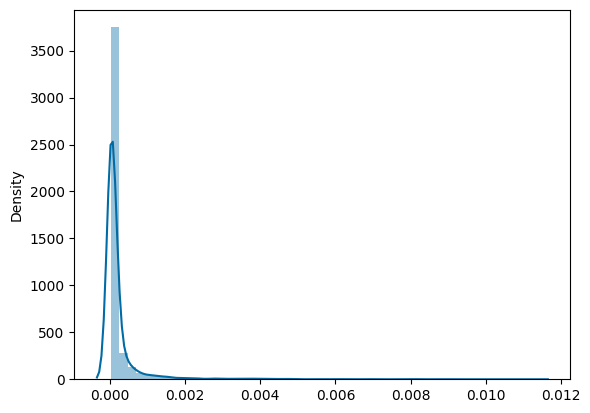

In [60]:
import warnings
warnings.filterwarnings('ignore') 
sns.distplot(x =[word_freq_df['frequency']])

# Analysis of Different categories of resumes¶

In [61]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])],color=["y","g","b","m"])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.show()

# peoplesoft resumes analysis

In [62]:
peoplesoft=resume_data.cleanResume[:20]  

In [63]:
peoplesoft_dev=pd.DataFrame(peoplesoft)  

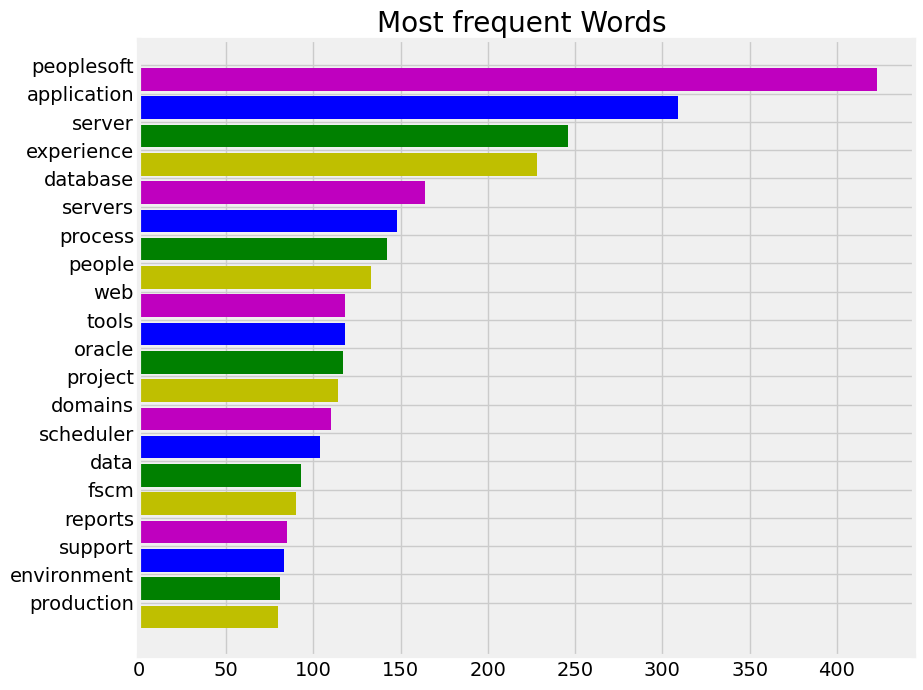

In [64]:
from collections import Counter
plt.figure(figsize=(10,8))
wordBarGraphFunction(peoplesoft_dev,"cleanResume","Most frequent Words ") 

# react_js resumes analysis

In [65]:
react=resume_data.cleanResume[20:44] 

In [66]:
react_js=pd.DataFrame(react) 

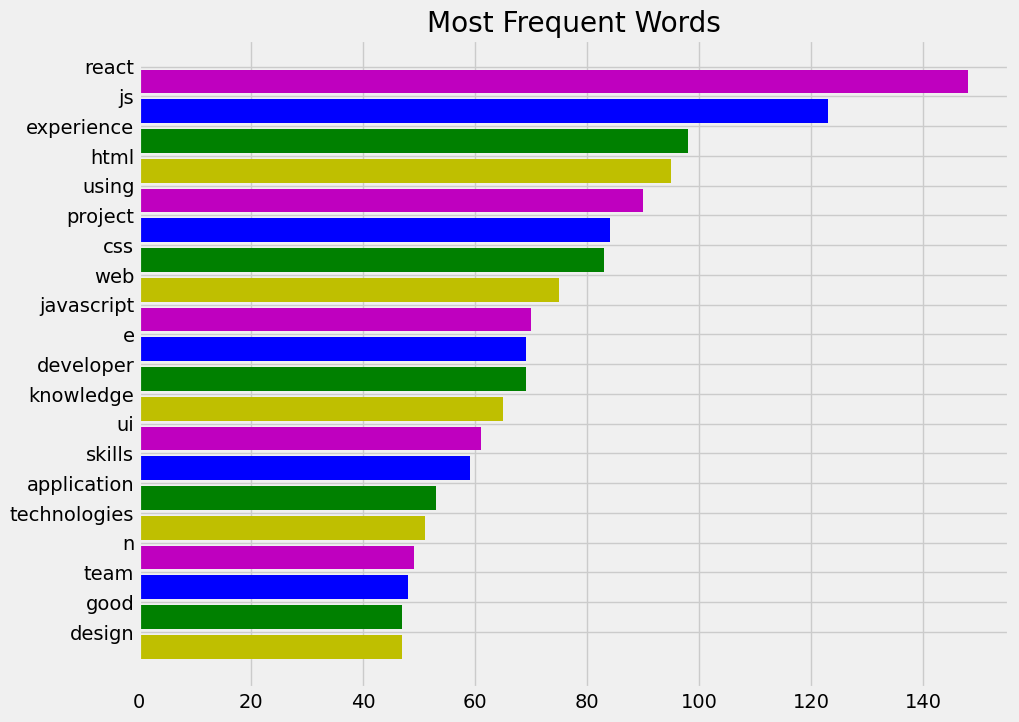

In [67]:
plt.figure(figsize=(10,8))
wordBarGraphFunction(react_js,"cleanResume","Most Frequent Words") 

# sql developers resumes analysis

In [68]:
sql=resume_data.cleanResume[44:58] 

In [69]:
sql_dev=pd.DataFrame(sql)

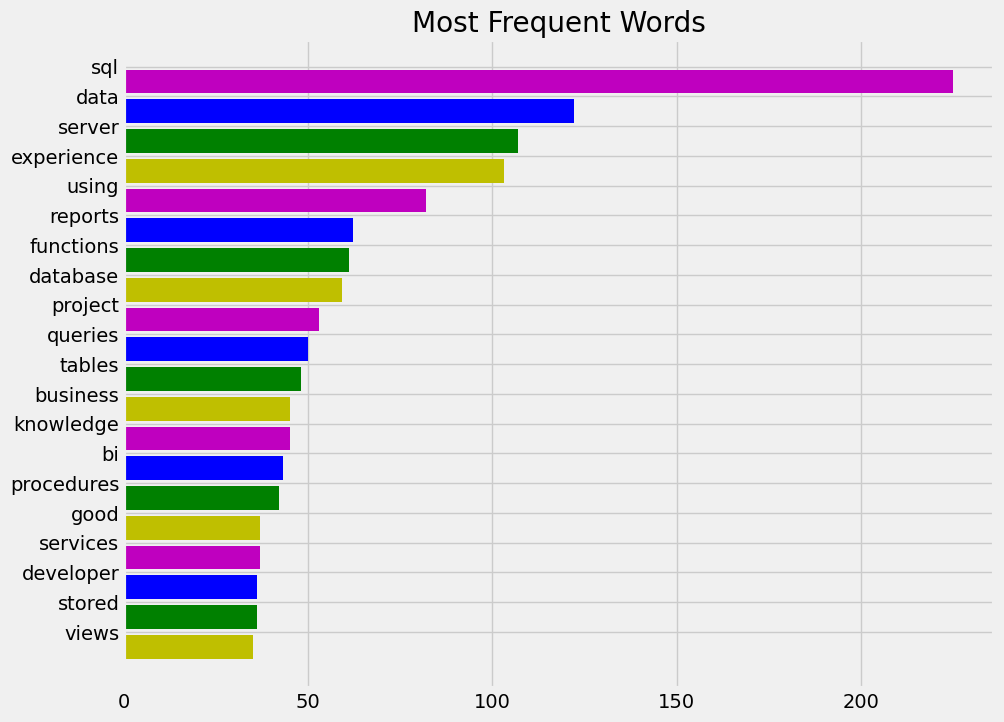

In [70]:
plt.figure(figsize=(10,8))
wordBarGraphFunction(sql_dev,"cleanResume","Most Frequent Words") 

# workday resume analysis

In [71]:
wd=resume_data.cleanResume[58:] 

In [72]:
workday=pd.DataFrame(wd)

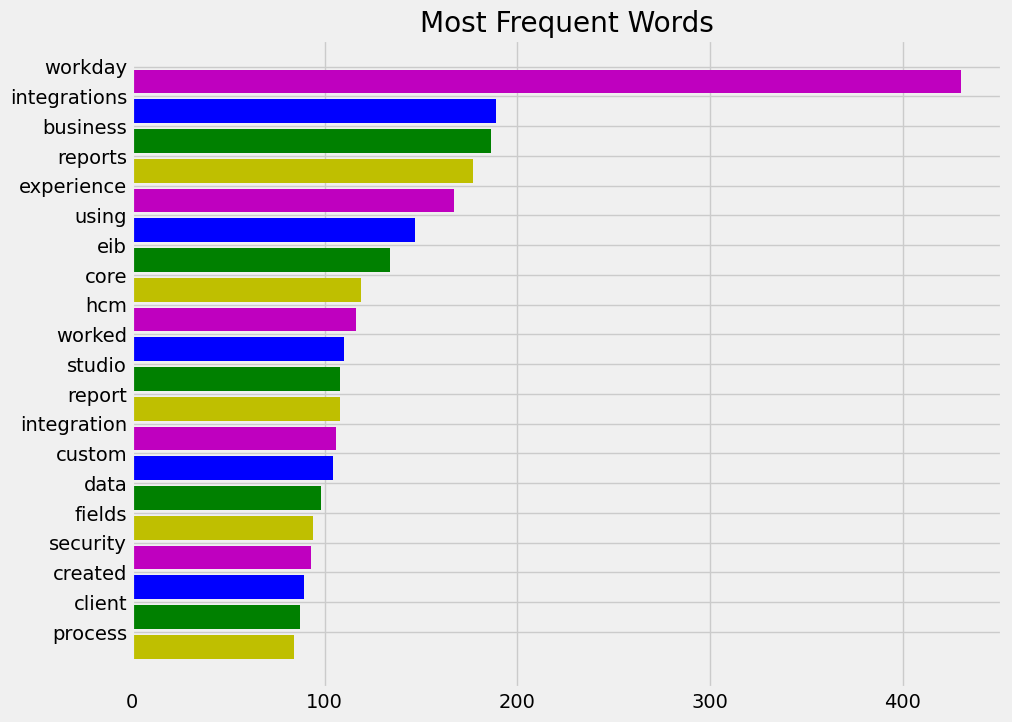

In [73]:
plt.figure(figsize=(10,8))
wordBarGraphFunction(workday,"cleanResume","Most Frequent Words") 

# Labelling the Categories

In [74]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
resume_data["Skill"]=le_encoder.fit_transform(resume_data["Category"])
resume_data

,Category,cleanResume,Skill
0,Peoplesoft resumes,anubhav kumar singh core competencies scriptin...,0
1,Peoplesoft resumes,profile summary years experience implementing ...,0
2,Peoplesoft resumes,peoplesoft database administrator gangareddy p...,0
3,Peoplesoft resumes,classification internal classification interna...,0
4,Peoplesoft resumes,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
74,workday resumes,workday integration consultant name sri krishn...,3
75,workday resumes,srikanth workday hcm consultant seeking suitab...,3
76,workday resumes,workday hcm fcm name kumar role workday consul...,3
77,workday resumes,venkateswarlu b workday consultant years exper...,3


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TF-IDF Vectorization

In [76]:
 requiredText = resume_data["cleanResume"].values
requiredTarget = resume_data["Skill"].values

In [77]:
word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',ngram_range=(1,3),
    sublinear_tf=True,
    stop_words='english',
    max_features=5000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


# Splitting the data

In [78]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,shuffle = True,random_state=20, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(55, 5000)
(24, 5000)


# Model Building

# Logistic Regression

In [79]:
# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Perform cross-validation on the training data
cv_scores = cross_val_score(logistic_classifier, X_train, y_train, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the Logistic Regression model on the entire training data
logistic_classifier.fit(X_train, y_train)

# Predicting on Training Data
pred_train_log = logistic_classifier.predict(X_train)

# Accuracy On Train Data
train_acc_log = np.mean(pred_train_log == y_train)
print("ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION:", train_acc_log)

# Predicting on Test Data
pred_test_log = logistic_classifier.predict(X_test)

# Accuracy On Test Data
test_acc_log = np.mean(pred_test_log == y_test)
print("ACCURACY OF TEST DATA IN LOGISTIC REGRESSION:", test_acc_log)

# Confusion Matrix
logistic_cm = confusion_matrix(y_test, pred_test_log)

# Classification Report
print("CLASSIFICATION REPORT OF LOGISTIC REGRESSION:\n", classification_report(y_test, pred_test_log))


Cross-Validation Scores: [0.90909091 1.         1.         0.90909091 1.        ]
Mean Cross-Validation Score: 0.9636363636363636
ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION: 1.0
ACCURACY OF TEST DATA IN LOGISTIC REGRESSION: 1.0
CLASSIFICATION REPORT OF LOGISTIC REGRESSION:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [80]:
accuracy_log = round(accuracy_score(y_test,pred_test_log),4)
precision_log = round(precision_score(y_test,pred_test_log,average = 'macro'),4)
recall_log = round(recall_score(y_test,pred_test_log,average = 'macro'),4)
f1_log = round(f1_score(y_test,pred_test_log,average = 'macro'),4)

# DECISION TREE

In [81]:
# Create a Decision Tree classifier
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Perform cross-validation on the training data
cv_scores = cross_val_score(DT_classifier, X_train, y_train, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the Decision Tree model on the entire training data
DT_classifier.fit(X_train, y_train)

# Predicting on Train Data
pred_train_dt = DT_classifier.predict(X_train)

# Accuracy On Train Data
train_acc_dt = np.mean(pred_train_dt == y_train)
print("ACCURACY OF TRAIN DATA IN DECISION TREE:", train_acc_dt)

# Predicting on Test Data
pred_test_dt = DT_classifier.predict(X_test)

# Accuracy on Test Data
test_acc_dt = np.mean(pred_test_dt == y_test)
print("ACCURACY OF TEST DATA IN DECISION TREE:", test_acc_dt)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, pred_test_dt)

# Classification Report
print("CLASSIFICATION REPORT OF DECISION TREE:\n", classification_report(y_test, pred_test_dt))


Cross-Validation Scores: [0.81818182 0.81818182 0.81818182 0.81818182 0.81818182]
Mean Cross-Validation Score: 0.8181818181818181
ACCURACY OF TRAIN DATA IN DECISION TREE: 0.8181818181818182
ACCURACY OF TEST DATA IN DECISION TREE: 0.8333333333333334
CLASSIFICATION REPORT OF DECISION TREE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00         7

    accuracy                           0.83        24
   macro avg       0.66      0.75      0.69        24
weighted avg       0.73      0.83      0.77        24



In [82]:
import warnings
warnings.filterwarnings('ignore') 
accuracy_dt = round(accuracy_score(y_test,pred_test_dt),4)
precision_dt = round(precision_score(y_test,pred_test_dt,average = 'macro'),4)
recall_dt = round(recall_score(y_test,pred_test_dt,average = 'macro'),4)
f1_dt = round(f1_score(y_test,pred_test_dt,average = 'macro'),4)

# 3. RANDOM FOREST

In [83]:
# Create a Random Forest classifier with your specified parameters
RF = {
    'n_estimators': 15,
    'class_weight': "balanced",
    'n_jobs': -1,
    'random_state': 42
}
RF_classifier = RandomForestClassifier(**RF)

# Perform cross-validation on the training data
cv_scores = cross_val_score(RF_classifier, X_train, y_train, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the Random Forest model on the entire training data
RF_classifier.fit(X_train, y_train)

# Predicting on Train Data
pred_train_rf = RF_classifier.predict(X_train)

# Accuracy On Train Data
train_acc_rf = np.mean(pred_train_rf == y_train)
print("ACCURACY OF TRAIN DATA IN RANDOM FOREST:", train_acc_rf)

# Predicting on Test Data
pred_test_rf = RF_classifier.predict(X_test)

# Accuracy on Test Data
test_acc_rf = np.mean(pred_test_rf == y_test)
print("ACCURACY OF TEST DATA IN RANDOM FOREST:", test_acc_rf)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, pred_test_rf)

# Classification Report
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n", classification_report(y_test, pred_test_rf)) 


Cross-Validation Scores: [1.         1.         1.         0.90909091 1.        ]
Mean Cross-Validation Score: 0.9818181818181818
ACCURACY OF TRAIN DATA IN RANDOM FOREST: 1.0
ACCURACY OF TEST DATA IN RANDOM FOREST: 1.0
CLASSIFICATION REPORT OF RANDOM FOREST:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [84]:
accuracy_rf = round(accuracy_score(y_test,pred_test_rf),4)
precision_rf = round(precision_score(y_test,pred_test_rf,average = 'macro'),4)
recall_rf = round(recall_score(y_test,pred_test_rf,average = 'macro'),4)
f1_rf = round(f1_score(y_test,pred_test_rf,average = 'macro'),4)

# SUPPORT VECTOR MACHINE

In [85]:
svm_classifier = (SVC(kernel='linear'))
svm_classifier.fit(X_train,y_train)

#Predicting On Train Data
pred_train_svm = svm_classifier.predict(X_train)
#Accuracy On Train Data
train_acc_svm = np.mean(pred_train_svm==y_train)
print("ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE:",train_acc_svm )

#Prediciting On Test Data
pred_test_svm = svm_classifier.predict(X_test)
#Accuracy On Test Data
test_acc_svm = np.mean(pred_test_svm==y_test)
print("ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE:",test_acc_svm)

#Confusion Matrix
svm_cm = confusion_matrix(y_test,pred_test_svm)

#Classification Report
print("CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:\n", classification_report(y_test,pred_test_svm))

ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE: 1.0
ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE: 1.0
CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [86]:
accuracy_svm = round(accuracy_score(y_test,pred_test_svm),4)
precision_svm = round(precision_score(y_test,pred_test_svm,average = 'macro'),4)
recall_svm = round(recall_score(y_test,pred_test_svm,average = 'macro'),4)
f1_svm = round(f1_score(y_test,pred_test_svm,average = 'macro'),4)

# MULTINOMIAL NAVIE BAYES

In [87]:
# Create a Multinomial Naive Bayes classifier
classifier_mb = MultinomialNB()

# Perform cross-validation on the training data
cv_scores = cross_val_score(classifier_mb, X_train, y_train, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the Multinomial Naive Bayes model on the entire training data
classifier_mb.fit(X_train, y_train)

# Predicting On Train Data
pred_train_mb = classifier_mb.predict(X_train)

# Accuracy On Train Data
train_acc_mb = np.mean(pred_train_mb == y_train)
print("ACCURACY OF TRAIN DATA IN MULTINOMIAL NAIVE BAYES:", train_acc_mb)

# Predicting On Test Data
pred_test_mb = classifier_mb.predict(X_test)

# Accuracy On Test Data
test_acc_mb = np.mean(pred_test_mb == y_test)
print("ACCURACY OF TEST DATA IN MULTINOMIAL NAIVE BAYES:", test_acc_mb)

# Confusion Matrix
mb_cm = confusion_matrix(y_test, pred_test_mb)

# Classification Report
print("CLASSIFICATION REPORT OF MULTINOMIAL NAIVE BAYES:\n", classification_report(y_test, pred_test_mb))


Cross-Validation Scores: [0.90909091 1.         1.         0.90909091 1.        ]
Mean Cross-Validation Score: 0.9636363636363636
ACCURACY OF TRAIN DATA IN MULTINOMIAL NAIVE BAYES: 1.0
ACCURACY OF TEST DATA IN MULTINOMIAL NAIVE BAYES: 0.9583333333333334
CLASSIFICATION REPORT OF MULTINOMIAL NAIVE BAYES:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24



In [88]:
accuracy_mb = round(accuracy_score(y_test,pred_test_mb),4)
precision_mb = round(precision_score(y_test,pred_test_mb,average = 'macro'),4)
recall_mb = round(recall_score(y_test,pred_test_mb,average = 'macro'),4)
f1_mb = round(f1_score(y_test,pred_test_mb,average = 'macro'),4)

# AdaBoost Classifier

In [89]:
# Create an AdaBoost classifier
ab_clf = AdaBoostClassifier()

# Perform cross-validation on the training data
cv_scores = cross_val_score(ab_clf, X_train, y_train, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the AdaBoost model on the entire training data
ab_clf.fit(X_train, y_train)

# Predicting On Train Data
pred_train_ab = ab_clf.predict(X_train)

# Accuracy On Train Data
train_acc_ab = np.mean(pred_train_ab == y_train)
print("ACCURACY OF TRAIN DATA IN AdaBoost Classifier:", train_acc_ab)

# Predicting On Test Data
pred_test_ab = ab_clf.predict(X_test)

# Accuracy On Test Data
test_acc_ab = np.mean(pred_test_ab == y_test)
print("ACCURACY OF TEST DATA IN AdaBoost Classifier:", test_acc_ab)

# Confusion Matrix
ab_cm = confusion_matrix(y_test, pred_test_ab)

# Classification Report
print("CLASSIFICATION REPORT OF AdaBoost Classifier:\n", classification_report(y_test, pred_test_ab))


Cross-Validation Scores: [0.81818182 0.72727273 0.90909091 0.63636364 0.81818182]
Mean Cross-Validation Score: 0.7818181818181819
ACCURACY OF TRAIN DATA IN AdaBoost Classifier: 0.7454545454545455
ACCURACY OF TEST DATA IN AdaBoost Classifier: 0.7083333333333334
CLASSIFICATION REPORT OF AdaBoost Classifier:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.71        24
   macro avg       0.62      0.69      0.63        24
weighted avg       0.60      0.71      0.63        24



In [90]:
accuracy_ab = round(accuracy_score(y_test,pred_test_ab),4)
precision_ab = round(precision_score(y_test,pred_test_ab,average = 'macro'),4)
recall_ab = round(recall_score(y_test,pred_test_ab,average = 'macro'),4)
f1_ab = round(f1_score(y_test,pred_test_ab,average = 'macro'),4)

# Gradient Boosting Classifier

In [91]:
# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Perform cross-validation on the training data
cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=5)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the Gradient Boosting model on the entire training data
gb_clf.fit(X_train, y_train)

# Predicting On Train Data
pred_train_gb = gb_clf.predict(X_train)

# Accuracy On Train Data
train_acc_gb = np.mean(pred_train_gb == y_train)
print("ACCURACY OF TRAIN DATA IN Gradient Boosting Classifier:", train_acc_gb)

# Predicting On Test Data
pred_test_gb = gb_clf.predict(X_test)

# Accuracy On Test Data
test_acc_gb = np.mean(pred_test_gb == y_test)
print("ACCURACY OF TEST DATA IN Gradient Boosting Classifier:", test_acc_gb)

# Confusion Matrix
gb_cm = confusion_matrix(y_test, pred_test_gb)

# Classification Report
print("CLASSIFICATION REPORT OF Gradient Boosting Classifier:\n", classification_report(y_test, pred_test_gb))


Cross-Validation Scores: [0.81818182 1.         1.         1.         1.        ]
Mean Cross-Validation Score: 0.9636363636363636
ACCURACY OF TRAIN DATA IN Gradient Boosting Classifier: 1.0
ACCURACY OF TEST DATA IN Gradient Boosting Classifier: 1.0
CLASSIFICATION REPORT OF Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [92]:
accuracy_gb = round(accuracy_score(y_test,pred_test_gb),4)
precision_gb = round(precision_score(y_test,pred_test_gb,average = 'macro'),4)
recall_gb = round(recall_score(y_test,pred_test_gb,average = 'macro'),4)
f1_gb = round(f1_score(y_test,pred_test_gb,average = 'macro'),4)

# Xtreme Gradient Boosting Classifier

In [93]:
# Create an XGBoost classifier
xgb_clf = XGBClassifier()

# Perform cross-validation on the training data
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, n_jobs=-1)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the XGBoost model on the entire training data
xgb_clf.fit(X_train, y_train)

# Predicting On Train Data
pred_train_xgb = xgb_clf.predict(X_train)

# Accuracy On Train Data
train_acc_xgb = np.mean(pred_train_xgb == y_train)
print("ACCURACY OF TRAIN DATA IN Xtreme Gradient Boosting Classifier:", train_acc_xgb)

# Predicting On Test Data
pred_test_xgb = xgb_clf.predict(X_test)

# Accuracy On Test Data
test_acc_xgb = np.mean(pred_test_xgb == y_test)
print("ACCURACY OF TEST DATA IN Xtreme Gradient Boosting Classifier:", test_acc_xgb)

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, pred_test_xgb)

# Classification Report
print("CLASSIFICATION REPORT OF Xtreme Gradient Boosting Classifier:\n", classification_report(y_test, pred_test_xgb))


Cross-Validation Scores: [0.90909091 1.         0.90909091 1.         1.        ]
Mean Cross-Validation Score: 0.9636363636363636
ACCURACY OF TRAIN DATA IN Xtreme Gradient Boosting Classifier: 1.0
ACCURACY OF TEST DATA IN Xtreme Gradient Boosting Classifier: 1.0
CLASSIFICATION REPORT OF Xtreme Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [94]:
accuracy_xgb = round(accuracy_score(y_test,pred_test_xgb),4)
precision_xgb = round(precision_score(y_test,pred_test_xgb,average = 'macro'),4)
recall_xgb = round(recall_score(y_test,pred_test_xgb,average = 'macro'),4)
f1_xgb = round(f1_score(y_test,pred_test_xgb,average = 'macro'),4)

# Light Gradient Boosting Classifier

In [95]:
# Create a LightGBM classifier
lgb_clf = LGBMClassifier()

# Perform cross-validation on the training data
cv_scores = cross_val_score(lgb_clf, X_train, y_train, cv=5, n_jobs=-1)  # You can adjust the number of folds with the 'cv' parameter

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Fit the LightGBM model on the entire training data
lgb_clf.fit(X_train, y_train)

# Predicting On Train Data
pred_train_lgb = lgb_clf.predict(X_train)

# Accuracy On Train Data
train_acc_lgb = np.mean(pred_train_lgb == y_train)
print("ACCURACY OF TRAIN DATA IN Light Gradient Boosting Classifier:", train_acc_lgb)

# Predicting On Test Data
pred_test_lgb = lgb_clf.predict(X_test)

# Accuracy On Test Data
test_acc_lgb = np.mean(pred_test_lgb == y_test)
print("ACCURACY OF TEST DATA IN Light Gradient Boosting Classifier:", test_acc_lgb)

# Confusion Matrix
lgb_cm = confusion_matrix(y_test, pred_test_lgb)

# Classification Report
print("CLASSIFICATION REPORT OF Light Gradient Boosting Classifier:\n", classification_report(y_test, pred_test_lgb))


Cross-Validation Scores: [0.81818182 0.81818182 1.         0.72727273 1.        ]
Mean Cross-Validation Score: 0.8727272727272728
ACCURACY OF TRAIN DATA IN Light Gradient Boosting Classifier: 1.0
ACCURACY OF TEST DATA IN Light Gradient Boosting Classifier: 1.0
CLASSIFICATION REPORT OF Light Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [96]:
accuracy_lgb = round(accuracy_score(y_test,pred_test_lgb),4)
precision_lgb = round(precision_score(y_test,pred_test_lgb,average = 'macro'),4)
recall_lgb = round(recall_score(y_test,pred_test_lgb,average = 'macro'),4)
f1_lgb = round(f1_score(y_test,pred_test_lgb,average = 'macro'),4)

# CONFUSION MATRIX

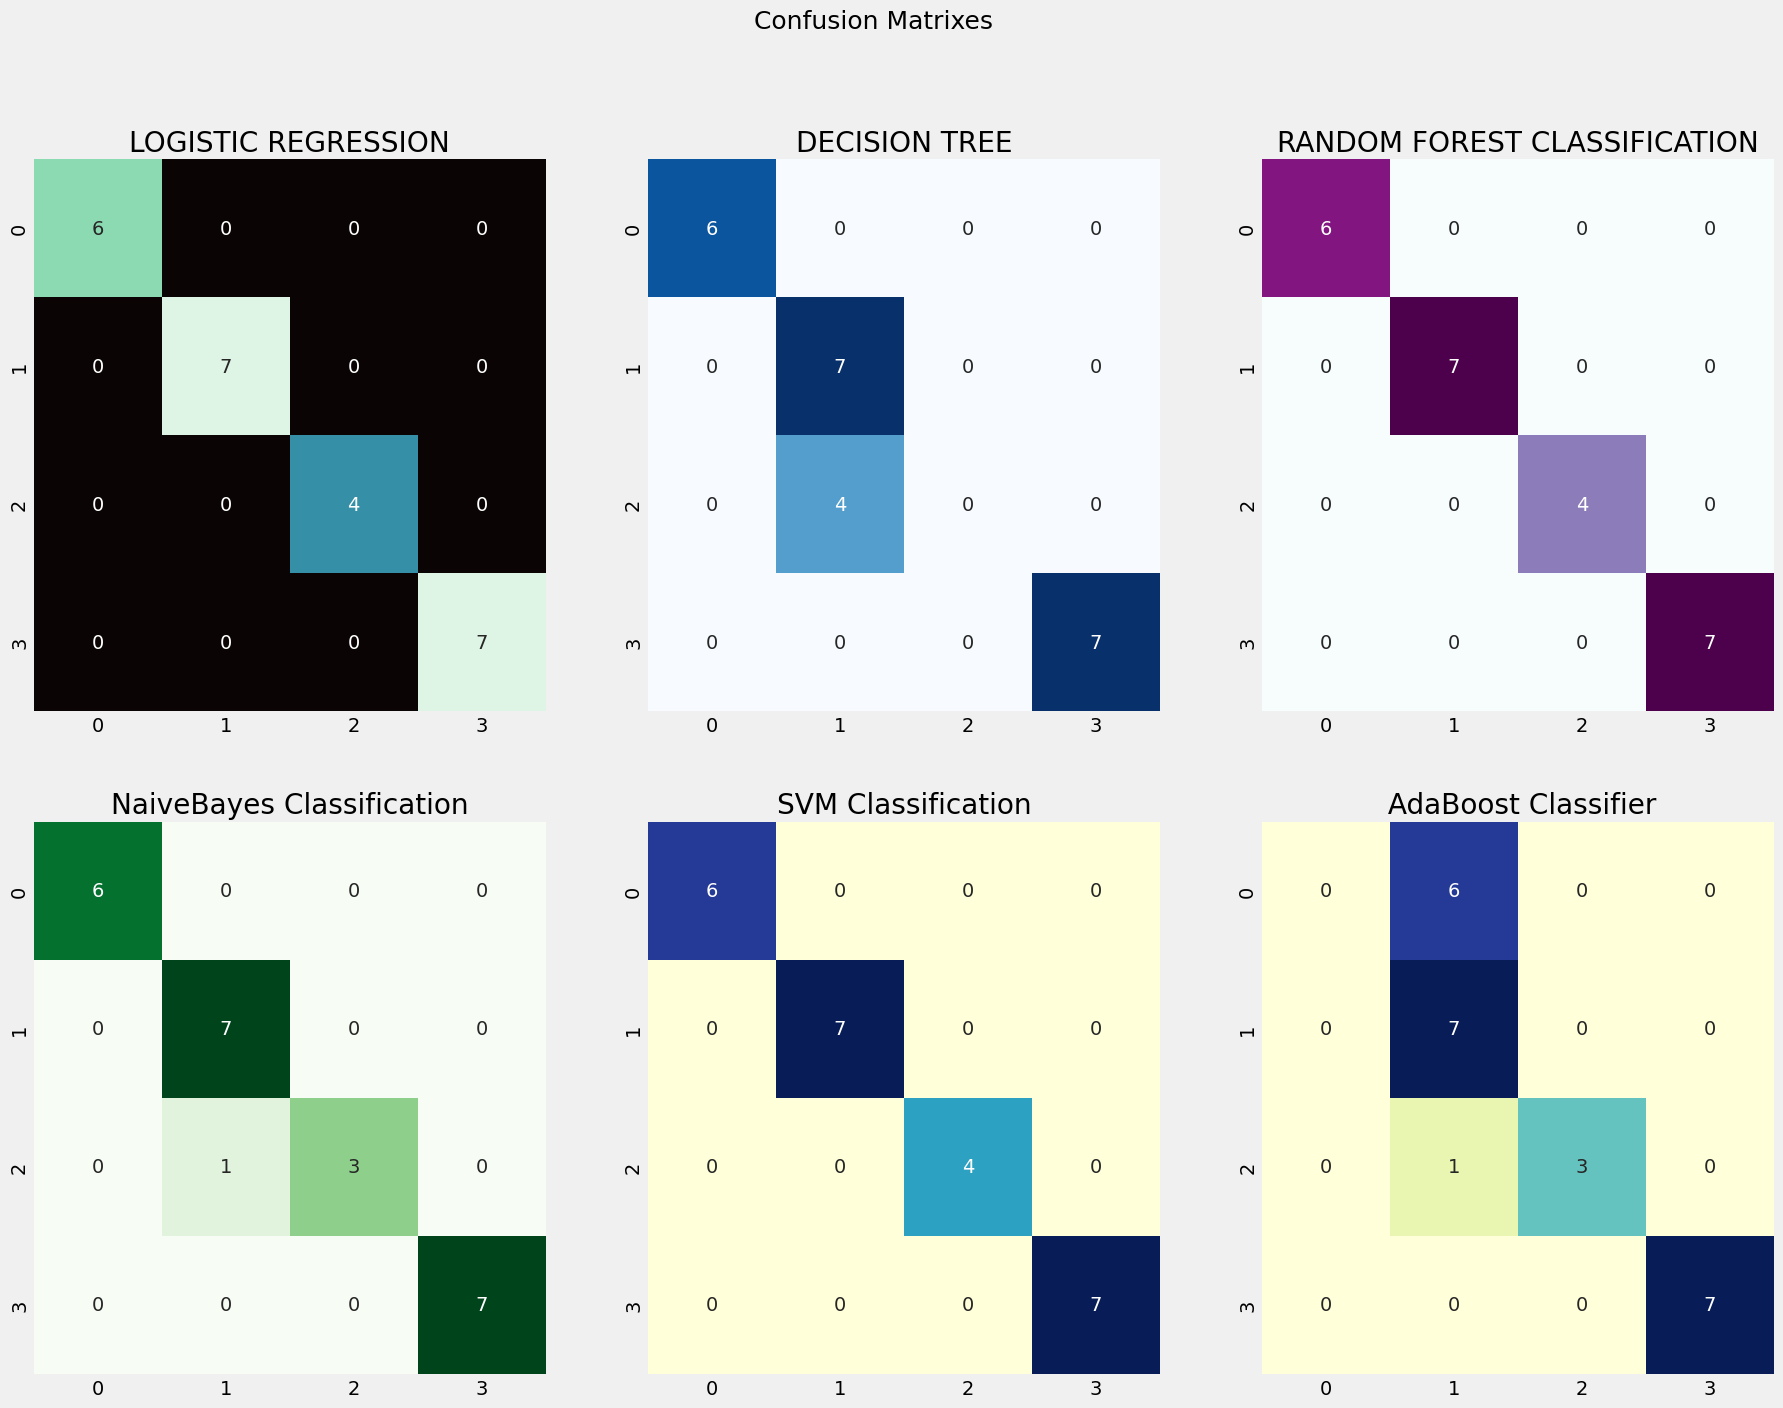

In [97]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("LOGISTIC REGRESSION")
sns.heatmap(logistic_cm, cbar=False, annot=True, cmap="mako",  fmt="d")

plt.subplot(2,3,2)
plt.title("DECISION TREE")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="Blues", fmt="d")

plt.subplot(2,3,3)
plt.title("RANDOM FOREST CLASSIFICATION")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="BuPu", fmt="d")

plt.subplot(2,3,4)
plt.title("NaiveBayes Classification")
sns.heatmap(mb_cm, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(2,3,5)
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

plt.subplot(2,3,6)
plt.title(" AdaBoost Classifier")
sns.heatmap(ab_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")

plt.show()

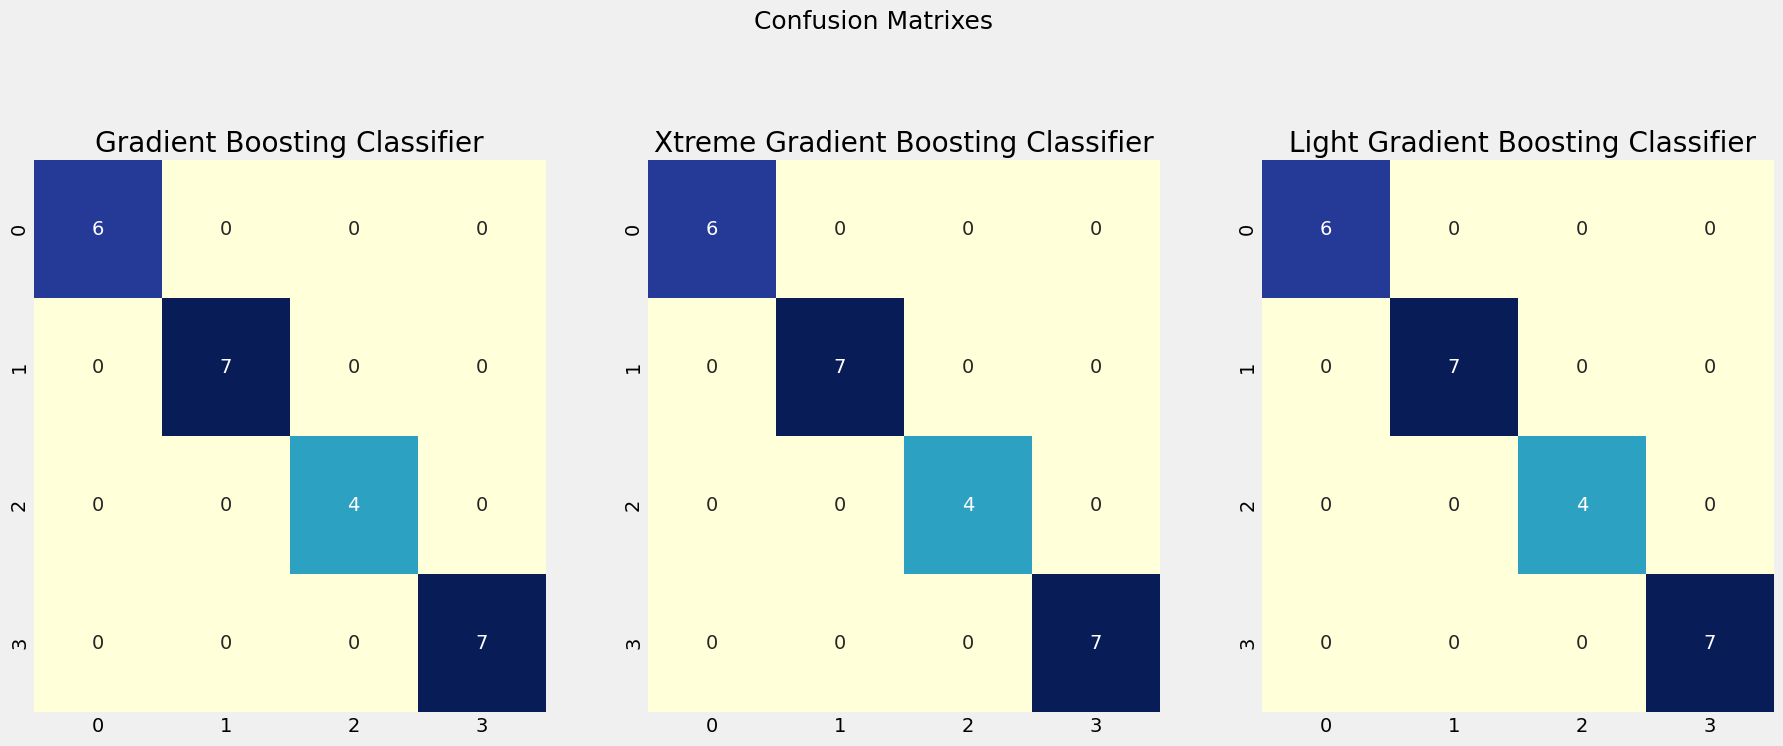

In [98]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes", fontsize=18)
plt.subplot(2,3,1)
plt.title("Gradient Boosting Classifier")
sns.heatmap(gb_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")
plt.subplot(2,3,2)
plt.title("Xtreme Gradient Boosting Classifier")
sns.heatmap(xgb_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")
plt.subplot(2,3,3)
plt.title(" Light Gradient Boosting Classifier")
sns.heatmap(lgb_cm, cbar=False, annot=True, cmap="YlGnBu",  fmt="d")
plt.show()

In [99]:
table = {'Classifier' : ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'MULTINOMIAL NAIVE BAYES', 'SUPPORT VECTOR MACHINE','AdaBoost Classifier','Gradient Boosting Classifier','Xtreme Gradient Boosting Classifier','Light Gradient Boosting Classifier'], 'Accuracy_Score' : [accuracy_log, accuracy_dt, accuracy_rf, accuracy_mb, accuracy_svm,accuracy_ab,accuracy_gb,accuracy_xgb,accuracy_lgb], 'Precision_Score' : [precision_log, precision_dt, precision_rf, precision_mb, precision_svm, precision_ab, precision_gb, precision_xgb, precision_lgb], 'Recall_Score' : [recall_log, recall_dt, recall_rf, recall_mb, recall_svm, recall_ab, recall_gb, recall_xgb, recall_lgb], 'F1-Score' : [f1_log, f1_dt, f1_rf, f1_mb, f1_svm, f1_ab, f1_gb, f1_xgb, f1_lgb]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy_Score,Precision_Score,Recall_Score,F1-Score
0,LOGISTIC REGRESSION,1.0000,1.0000,1.0000,1.0000
1,DECISION TREE,0.8333,0.6591,0.7500,0.6944
2,RANDOM FOREST,1.0000,1.0000,1.0000,1.0000
3,MULTINOMIAL NAIVE BAYES,0.9583,0.9688,0.9375,0.9476
4,SUPPORT VECTOR MACHINE,1.0000,1.0000,1.0000,1.0000
5,AdaBoost Classifier,0.7083,0.6250,0.6875,0.6310
6,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
7,Xtreme Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
8,Light Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000


# ACCURACY COMPARISON PLOT

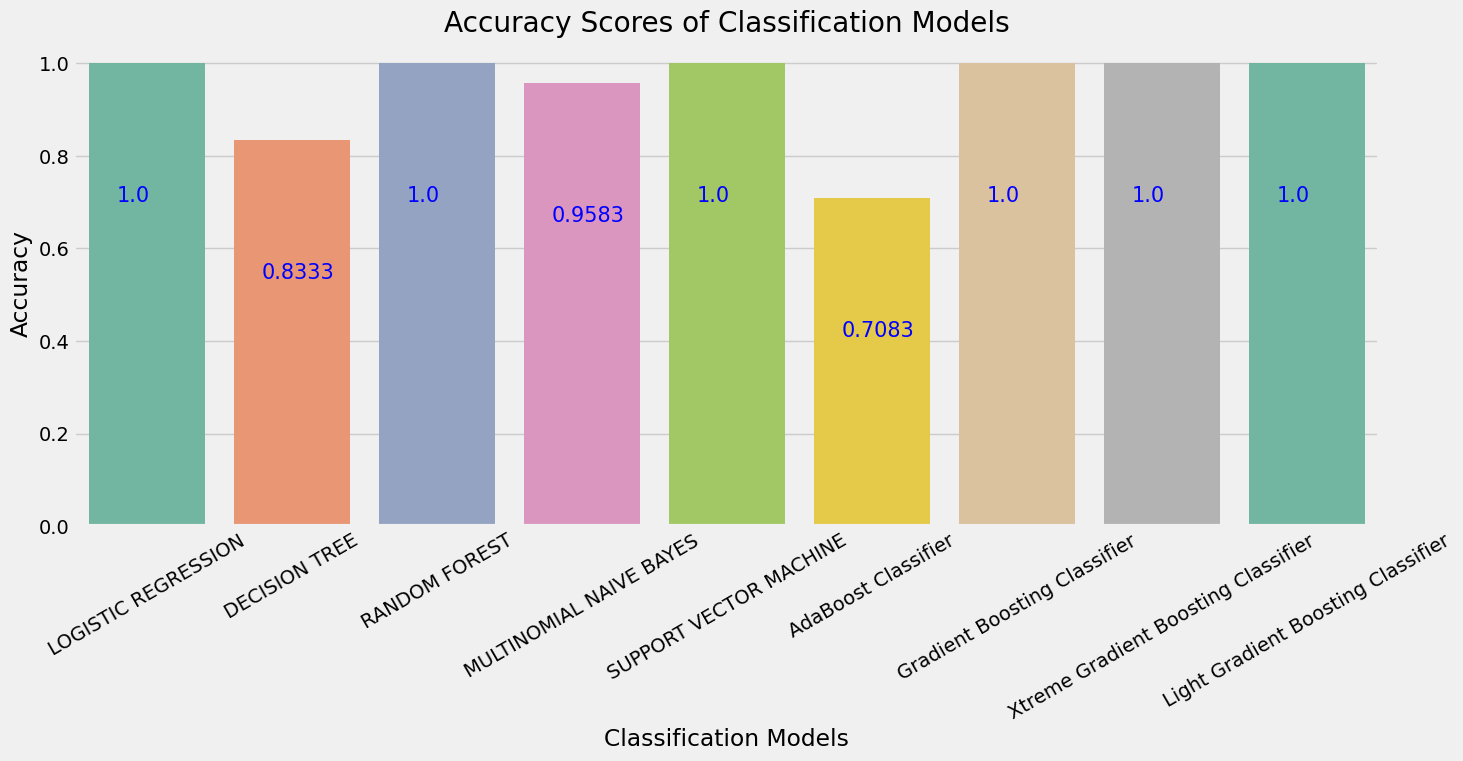

In [100]:
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy_Score, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()